# Initialization

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Run this in the same folder as the database
database = 'database.sqlite'

# Connect to database and list all tables

In [3]:
db = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        from sqlite_master
                        WHERE type = 'table';""", db)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# List of countries

In [4]:
countries = pd.read_sql("""SELECT *
                           FROM Country;""", db)

countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [5]:
league = pd.read_sql("""SELECT *
                        FROM League;""", db)

league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


# List of leagues and their corresponding countries

In [6]:
league = pd.read_sql("""SELECT *
                        FROM League l
                        JOIN Country c
                        ON c.id = l.country_id;""", db)

league

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


# List of first 10 teams in alphabetical order

In [7]:
teams = pd.read_sql("""SELECT *
                        FROM TEAM
                        ORDER BY team_long_name
                        LIMIT 10;""", db)

teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


# List of matches with extra information
- All id numbers as names
- Order by date
- Include only entries from Spain
- First 10 entries only

In [13]:
match = pd.read_sql("""SELECT m.id,
                              c.name AS 'country_name',
                              l.name AS 'league_name',
                              m.season,
                              m.stage,
                              m.date,
                              ht.team_long_name AS 'home_team',
                              at.team_long_name AS 'away_team',
                              m.home_team_goal,
                              m.away_team_goal
                       FROM Match m
                       JOIN Country c ON m.country_id = c.id
                       JOIN League l ON m.league_id = l.id
                       LEFT JOIN Team ht ON m.home_team_api_id = ht.team_api_id
                       LEFT JOIN Team at ON m.away_team_api_id = at.team_api_id
                       WHERE country_name = 'Spain'
                       ORDER by m.date
                       LIMIT 10;""", db)

match

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


# List of average goals per game

In [22]:
league_by_season = pd.read_sql("""SELECT m.id,
                                         c.name AS 'country_name',
                                         l.name AS 'league_name',
                                         m.season,
                                         COUNT(distinct m.stage) AS 'number_of_stages',
                                         COUNT(distinct ht.team_long_name) AS 'number_of_teams',
                                         ht.team_long_name AS 'home_team',
                                         at.team_long_name AS 'away_team',
                                         AVG(m.home_team_goal) AS 'avg_home_team_scores',
                                         AVG(m.away_team_goal) AS 'avg_away_team_goals',
                                         AVG(m.home_team_goal) - AVG(m.away_team_goal) AS 'avg_goal_diff',
                                         AVG(m.home_team_goal + m.away_team_goal) AS 'avg_goals',
                                         SUM(m.home_team_goal + m.away_team_goal) AS 'total_goals'
                                  FROM Match m
                                  JOIN Country c ON m.country_id = c.id
                                  JOIN League l ON m.league_id = l.id
                                  LEFT JOIN Team ht ON m.home_team_api_id = ht.team_api_id
                                  LEFT JOIN Team at ON m.away_team_api_id = at.team_api_id
                                  
                                  WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                  GROUP BY c.name, l.name, m.season
                                  ORDER BY c.name, l.name, m.season DESC;""", db)

league_by_season

,id,country_name,league_name,season,number_of_stages,number_of_teams,home_team,away_team,avg_home_team_scores,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
0,4389,England,England Premier League,2015/2016,38,20,Arsenal,West Ham United,1.492105,1.207895,0.284211,2.700000,1026
1,4009,England,England Premier League,2014/2015,38,20,Arsenal,Crystal Palace,1.473684,1.092105,0.381579,2.565789,975
2,3629,England,England Premier League,2013/2014,38,20,Arsenal,Aston Villa,1.573684,1.194737,0.378947,2.768421,1052
3,3249,England,England Premier League,2012/2013,38,20,Arsenal,Sunderland,1.557895,1.239474,0.318421,2.797368,1063
4,2869,England,England Premier League,2011/2012,38,20,Blackburn Rovers,Wolverhampton Wanderers,1.589474,1.215789,0.373684,2.805263,1066
5,2489,England,England Premier League,2010/2011,38,20,Aston Villa,West Ham United,1.623684,1.173684,0.450000,2.797368,1063
6,2109,England,England Premier League,2009/2010,38,20,Manchester United,Birmingham City,1.697368,1.073684,0.623684,2.771053,1053
7,1729,England,England Premier League,2008/2009,38,20,Manchester United,Newcastle United,1.400000,1.078947,0.321053,2.478947,942
8,7429,France,France Ligue 1,2015/2016,38,20,SC Bastia,Stade Rennais FC,1.436842,1.089474,0.347368,2.526316,960
9,7049,France,France Ligue 1,2014/2015,38,20,Stade de Reims,Paris Saint-Germain,1.410526,1.081579,0.328947,2.492105,947


# Line graph comparison of average goals per game by each country over time

<Axes: title={'center': 'Average Goals per Game Over Time'}>

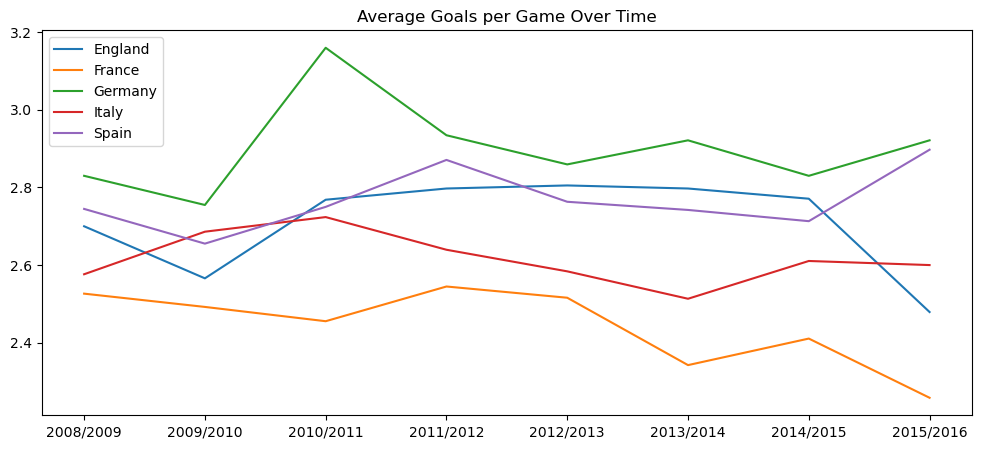

In [24]:
df = pd.DataFrame(index=np.sort(league_by_season['season'].unique()), columns=league_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(league_by_season.loc[league_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(league_by_season.loc[league_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(league_by_season.loc[league_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(league_by_season.loc[league_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(league_by_season.loc[league_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')